# Implementing dimensionless units

This section is focused on indentifying the natural units and converting the parameters to dimensionless units 

We first focus on the impingement, evaporation and surface migration rate. These rates have been defined as
\begin{equation}
    \begin{split}
        k^{+} &= \mathrm{exp}\left(\Delta \mu / k_{B} T \right) k_{3}^{-},\\
        k_{n}^{-} &= \nu \, \mathrm{exp}\left(- n \varphi / k_{B} T \right),\\
        k_{nm} &= \frac{1}{8} \nu \, \mathrm{exp}\left\{- \left[ E_{\mathrm{sd}} (n,m) + \Delta E (n,m) \right] / k_{B} T \right\},
    \end{split}
\end{equation}
respectively.\
The natural units in these three equations are:
- The frequency factor $\nu$ which represents the frequency at which collisions occur.
- The Boltzmann constant $k_{B}$.
- The energy required to break the bond with one neighbor $\varphi$.

From these equations we can create the following dimensionless parameters
\begin{equation}
    \tilde{k} = \frac{k}{\nu}, \qquad \qquad \tilde{T} = \frac{k_{B}}{\varphi} T, \qquad \qquad \tilde{\mu} = \frac{\mu}{\varphi}, \qquad \qquad \tilde{E} = \frac{E}{\varphi}.
\end{equation}
The dimensionless impingement, evaporation and surface migration rate will then become
\begin{equation}
    \begin{split}
        \tilde{k}^{+} &= \mathrm{exp}\left(\Delta \tilde{\mu} / \tilde{T} \right) \tilde{k}_{3}^{-},\\
        \tilde{k}_{n}^{-} &= \mathrm{exp}\left(- n / \tilde{T} \right),\\
        \tilde{k}_{nm} &= \frac{1}{8} \mathrm{exp}\left\{- \left[ \tilde{E}_{\mathrm{sd}} (n,m) + \Delta \tilde{E} (n,m) \right] / \tilde{T} \right\},
    \end{split}
\end{equation}

The activation energy $E_{sd}$ is specified as
\begin{equation}
    E_\mathrm{sd} (n,m) = \begin{cases} \varphi/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 \varphi / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 \varphi /2, & \mbox{if } n \mbox{ and } m>2, \end{cases}
\end{equation}
and the $\textbf{other}$ energy $\Delta E$ is specified as
\begin{equation}
    \Delta E (n,m) = \begin{cases} (n-m)\varphi & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}
\end{equation}

Converting these energies into dimensionless units will give
\begin{equation}
    \begin{split}
        \tilde{E}_\mathrm{sd} (n,m) &= \begin{cases} 1/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 /2, & \mbox{if } n \mbox{ and } m>2, \end{cases}\\
        \\
        \Delta \tilde{E} (n,m) &= \begin{cases} n-m & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}
    \end{split}
\end{equation}

# Growth rate

$\textbf{The growth rate is one of the observables that we can investigate in our simulation.}$

The growth rate resulting from the spiral mechanism alone is
\begin{equation}
    \frac{R}{k^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \mu /k_{B}T)]}{\varphi / 2 k_{B} T - \ln[\coth(\varphi / 4 k_{b} T)]}.
\end{equation}
Here $b$ represents the magnitude of the Burgers vector of the dislocation pair in units of the layer spacing, and $d$ is the layer spacing.

In dimensionless units
\begin{equation}
    \frac{R}{k^{+}d}=\frac{\tilde{R}}{\tilde{k}^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \tilde{\mu} /\tilde{T})]}{1 / 2 \tilde{T} - \ln[\coth(1 / 4 \tilde{T})]}.
\end{equation}

The growth rate of a perfect crystal is
\begin{equation}
    \frac{R}{k^{+}d} = \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right)
\end{equation}
Here $\gamma$ represents the extra free energy of an atom at the edge of the cluster. Cluster refers to a cluster of adatoms.

In dimensionless units
\begin{equation}
    \frac{\tilde{R}}{\tilde{k}^{+}d} = \frac{R}{k^{+}d} = \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \tilde{\mu}}{\tilde{T}} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \tilde{\mu}}{\tilde{T}} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \tilde{\gamma}^2}{3 \tilde{T} \Delta \tilde{\mu}} \right)
\end{equation}

The growth rate essencially represents the average growth per collision. With respect to the Monte Carlo simulation is is the growth per cycle.????????

# Nucleation and critical clusters

Quote from paper:

-----------------------------------------
$\textit{"In the absence of nucleation, the probability of finding a cluster of $n$ atoms on a paticular site is}$
\begin{equation}
    p_n \cong \mathrm{exp}(- G_{n}/k_{B}T),
\end{equation}
$\textit{where}$
\begin{equation}
    G_n \cong 4 \gamma \sqrt{n} - n \Delta \mu,
\end{equation}
$\textit{is the extra free energy after the formation of a cluster of n atoms on a}$ (001) $\textit{surface.}$\
$\textit{The rate of formation of 2D nuclei at a site is}$
\begin{equation}
    J = Z \Gamma_{n^{*}} p_{n^{*}}.
\end{equation}
$\textit{Here $n^{*}$ represents the number of atoms in a critical cluster, and it is the value of $n$ which yields the maximum $G_{n}$.}$ $\textit{$\Gamma_{n^{*}}$ is the rate of addition of atoms to a critical cluster, $Z$ is the Zeldovich non-equilibrium factor which accounts for a}$ $\textit{reduction in the number of clusters during stead-state nucleation."}$

-----------------------------------------
Therefore, the value of $n^{*}$ is determined by
\begin{equation}
    \left.\frac{d G_n}{dn}\right\vert_{n^{*}} = \frac{2 \gamma}{\sqrt{n^{*}}} - \Delta \mu = 0
\end{equation}
The number of atoms in a critical cluster is therefore $n^{*} = 4\left(\frac{\gamma}{\Delta \mu}\right)^2 = 4\left(\frac{\tilde{\gamma}}{\Delta \tilde{\mu}}\right)^2$.\
\
This result is consistent with figure 2 from the paper. It shows that for larger values of $\Delta \mu$ the growthrate $R/k^{+}d$ increases. The result from the equation shows that for larger values of $\Delta \mu$ the number of atoms in a critical cluster $n^{*}$ decreases. This is consisten with figure 2 because smaller values for $n^{*}$ indicate that smaller clusters will be sustainable (and grow).\
\
The value of $\gamma$ at temperatures higher than $0.8 T_{R}$ is $\gamma = 0$. At temperatures less than $0.8 T_{R}$
\begin{equation}
    \begin{split}
        \gamma/k_{B} T &= \varphi / 2 k_{B} T - \mathrm{ln}[\mathrm{coth}(\varphi/ 4 k_{B} T)]\\
        \tilde{\gamma}/\tilde{T} &= 1/2\tilde{T} - \mathrm{ln}[\mathrm{coth}(1/4 \tilde{T})]
    \end{split}
\end{equation}
In literature, the roughening temperature $T_R$ has been determined to be $L/k_{B}T_R = 4.9$. The parameter $L$ is the binding energy of the simple cubic lattice, where $L = \varphi 3$. The dimensionless roughening temperature is therefore $\tilde{T}_R = 4.9/3$.

# 2D nucleation vs spiral growth

The rate of formation on a perfect (001) surface is
\begin{equation}
    J = k^{+} (\Delta \mu / k_{B} T)^{1/2} \mathrm{exp}[-4 \gamma^2 / (k_{B} T \Delta \mu)].
\end{equation}
For values of $\Delta \mu$ in the range: $0 \leq \Delta \mu \leq \gamma^2/k_{B} T$, the exponential is very small. This is therefore the range where screw dislocations are imporatant.\
\
The rate of formation due to dislocation is
\begin{equation}
    I = bc \Delta \mu /(19 \gamma a),
\end{equation}
with $b$ the magnitude of the Burgers vector and $c$ the step velocity.\
\
The time $\tau$ to grow one layer of the crystal is retated to $J$ and $I$ as
\begin{equation}
    \frac{1}{3}\pi J \rho c^2 \tau^3 + I \tau = 1.
\end{equation}
Defining $Q \equiv (\frac{1}{3} \pi J \rho c^2)^{1/3}$, we can rewrite the previous equation as
\begin{equation}
    (Q \tau)^{3} + (I \tau) = 1,
\end{equation}
which gives in the limits
\begin{equation}
    \tau^{-1} \cong \begin{cases} Q + I/3, & \mbox{if } I \ll Q \\ I [1 + (Q/I)^3], & \mbox{if } I \gg Q \end{cases}
\end{equation}

The goal is to use the Monte Carlo simulation to simulate the growth rate of a crystal at different temperatures and different chemical potentials for both a perfect cystal suface and spiral growth due to dislocation. Therefore, we need to determine what the conditions (i.e. temperature and chemical potential) are where the "boundary" between growth dominated due to 2D nucleation and spiral growth is.\
The spiral growth regime will be limited to the values of $\Delta \mu$ where $Q \leq I/3$. The growth due to 2D nucleation in this regime will be less than 4\%. The boundary will therefore obey
\begin{equation}
    \begin{split}
        \frac{\Delta \mu_0}{k_{B} T} &= \frac{-1.333 (\gamma / k_{B} T)^{2}}{\mathrm{ln}[0.0168 (c/ k^{+} a)^{1/3} (\Delta \mu_0 / k_{B} T)^{5/6} (k_{B} T / \gamma) b]},\\
        \\
        \frac{\Delta \tilde{\mu}_0}{\tilde{T}} &= \frac{-1.333 (\tilde{\gamma}/ \tilde{T})^2}{\mathrm{ln}[0.0168 (\tilde{c}/\tilde{k}^{+} a)^{1/3} (\Delta \tilde{\mu} / \tilde{T})^{5/6} (\tilde{T}/ \tilde{\gamma})b]},
    \end{split}
\end{equation}
where $a$ is the modulus of the lattice constant and $b$ is the magnitude of the Burgers vector.\
\
The parameter $c$ is the step velocity. At low temperatures the step velocity is
\begin{equation}
    \begin{split}
        c &= k^{+} a [1 - \mathrm{exp}(- \Delta \mu / k_{B} T)],\\
        \tilde{c} &= \tilde{k}^{+} a [1 - \mathrm{exp}(- \Delta \tilde{\mu} / \tilde{T})],
    \end{split}
\end{equation}
with $\tilde{c} = c/\nu$. However because $c$ is in the argurment of the logarithm this expression of $c$ can also be used to determine the boundary between the different growth regions. The magnitude of the lattice vector $a$ is set to unity.

As $\Delta \tilde{\mu}_0$ is at both side of the equation for the growth boundary, the value of $\Delta \tilde{\mu}_0$ has to be solved by iteration.

----------------------------

$\textbf{First function}$\
Calculating the value of $\tilde{\gamma}$ using
\begin{equation}
    \tilde{\gamma}/\tilde{T} = 1/2\tilde{T} - \mathrm{ln}[\mathrm{coth}(1/4 \tilde{T})].
\end{equation}
As $\mathrm{coth}(x) = \frac{1}{\tanh(x)}$
\begin{equation}
    \tilde{\gamma}/\tilde{T} = 1/2\tilde{T} + \mathrm{ln}[\mathrm{tanh}(1/4 \tilde{T})].
\end{equation}
\
$\textbf{Second fuction}$\
Calculating the value of $\tilde{k}^{+}$ using
\begin{equation}
    \begin{split}
        \tilde{k}^{+} &= \mathrm{exp}\left(\Delta \tilde{\mu} / \tilde{T} \right) \tilde{k}_{3}^{-},\\
        \tilde{k}_{n}^{-} &= \mathrm{exp}\left(- n / \tilde{T} \right),\\
    \end{split}
\end{equation}
\
$\textbf{Third function}$\
Calculating the value of $c$ using
\begin{equation}
    \begin{split}
        \tilde{c} &= \tilde{k}^{+} a [1 - \mathrm{exp}(- \Delta \tilde{\mu} / \tilde{T})]
    \end{split}
\end{equation}
with $a$ unity.\
\
$\textbf{Fourth function}$\
Calculating the value of $\frac{\Delta \tilde{\mu}_0}{\tilde{T}}$ using
\begin{equation}
    \frac{\Delta \tilde{\mu}_0}{\tilde{T}} = \frac{-1.333 (\tilde{\gamma}/ \tilde{T})^2}{\mathrm{ln}[0.0168 (\tilde{c}/\tilde{k}^{+} a)^{1/3} (\Delta \tilde{\mu} / \tilde{T})^{5/6} (\tilde{T}/ \tilde{\gamma})b]}
\end{equation}

## Code

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def gamma_func(T):
    """Function for the extra free energy of an atom at the edge of the cluster (called gamma).
    Gamma is 0 at temperatures higher than 0.8T_R, where T_R is the roughening temperature, which
    in literature is L / (k_B T_R) = 4.9. L is the binding energy of the simple cubic crystal 
    (L = \varphi 3) and k_B is the boltzmann constant. However the input value for this function 
    is dimensionless T, the dimensionless roughening temperature is therefore T_R = 4.9/3. At lower
    temperatures gamma is determined via the equation used in this fuction.
    
    Parameter
    ---------
    T : float
        Dimensionless temperature
    
    Return
    ------
    gamma : float
        The extra free energy of an atom at the edge of the cluster
    """
    T_R = 4.9/3
    
    if T >= T_R:
        gamma = 0
    else:
        gamma = (1/(2 * T) + np.log(np.tanh(1 / (4 * T))))
    
    return gamma

def imping_rate(mu, T):
    """The dimensionless impingement rate
    
    Parameter
    ---------
    mu : float
        Dimensionless chemical potential
    T : float
        Dimensionless temperature
    
    Return
    ------
    k_p : float
        Dimensionless impingement rate
    """
    n = 3
    
    k_3 = np.exp(-3/T)
    k_p = np.exp(mu/T)*k_3
    
    return k_p

def step_v(k_p, mu, T):
    """The dimensionless step velocity.
    
    Parameter
    ---------
    k_p : float
        Dimensionless impingment rate
    mu : float
        Dimensionless chemical potential
    T : float
        Dimensionless temperature
    
    Return
    ------
    c : float
        dimensionless step velocity
    """
    
    c = k_p * (1 - np.exp(-mu/T))
    
    return c

def growth_func(mu, T, b):
    gamma = (1/2 * T + np.log(np.tanh(1 / (4 * T))))
    k_p = imping_rate(mu, T)
    c = step_v(k_p, mu, T)
    
    mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *
                                       (mu/T)**(5/6) * (T/gamma) * b)
    
    return mu_new

def growth_bound(mu, T, b):
    """The boundary between 2D nucleation and spiral growth.
    The boundary value of the chemical potential at different temperatures determined
    through itiration.
    
    Parameter
    ---------
    mu : float
        Initial dimensionless chemical potential
    T : nd.array
        Dimensionless temperature
    b : float
        The magnitude of the Burgers vector (the hight of the dislocation)
    
    Return
    ------
    mu_bound : nd.array
        The boundary value of the chemical potential between 2D nucleation and spiral 
        growth at different temperatures
    """
    
    d_mu = 1e-6
    diml_mu = np.array([])
    
    for T_i in T:
        
        mu_1 = growth_func(mu, T_i, b)
        mu_2 = growth_func(mu_1, T_i, b)
        mu_i = mu_2
        
        error = ((mu_1 - mu_2)/ mu_1)**2
        
        n = 0
        while error > d_mu:
            n = n+1
            mu_j = growth_func(mu_i, T_i, b)
            error = ((mu_i - mu_j)/ mu_i)**2
            mu_i = mu_j
        
        diml_mu = np.append([diml_mu], [mu_i])
        mu = mu_i
    
    new_mu = diml_mu*T
    
    return new_mu


$\textbf{Determining the growth boundary}$

In [67]:
diml_Tmin = 4.9
diml_Tmax = 30
diml_dT = 0.1
diml_T = np.arange(diml_Tmin, diml_Tmax+diml_dT, diml_dT, dtype=float)

init_diml_mu = 1

b = 2

L = 3

T = L/diml_T
init_mu = init_diml_mu*T[0]

mu = growth_bound(init_mu, T, b)

/tmp/ipykernel_20671/592475509.py:80: RuntimeWarning: invalid value encountered in log
  mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *


In [68]:
print(mu)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [53]:
print(mu)
mu_1 = growth_func(mu, T, b)
print(mu_1)
mu_2 = growth_func(mu_1, T, b)
print(mu_2)
mu_3 = growth_func(mu_2, T, b)
print(mu_3)
mu_4 = growth_func(mu_3, T, b)
print(mu_4)

[0.17036147 0.16591009 0.16130331]
[0.46752595 0.46999628 0.47267499]
[0.21369543 0.20956871 0.20527227]
[0.39256317 0.39252282 0.3925042 ]
[0.24496628 0.24126464 0.23739839]


In [69]:
T_min = 3/diml_Tmin
mu_1 = T_min
mu_2 = growth_func(mu_1, T_min, b)

/tmp/ipykernel_20671/592475509.py:80: RuntimeWarning: invalid value encountered in log
  mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *


In [71]:
print(imping_rate(mu_1, T_min))
print(mu_2)

0.02024191144580438
nan


In [72]:
L = 3
diml_T = 20
diml_mu = 1

T = L/diml_T
mu = diml_mu*T

gamma = gamma_func(T)
k_p = imping_rate(mu, T)
c = step_v(k_p, mu, T)

print(gamma)
print(k_p)
print(c)

3.2619550568869635
5.602796437537267e-09
3.541642815098709e-09


# Paper dimensionless parameter

This section is focused on using the dimensionless parameters from the paper

Dimensionless parameters used in the paper are:
- The chemical potential $\Delta \mu$ is give as the ratio $\frac{\Delta \mu}{k_{B} T}$.
- The temperature $T$ is give as the ratio $\frac{L}{k_{B} T}$.\
The parameter $L$ is the binding energy of the simple cubic lattice, where $L = 3 \varphi$. Therefore, $\varphi / k_{B} T = \frac{1}{3} L/ k_{B} T$.

- The growth rate $R$ is give as the ratio $\frac{R}{k^{+} d}$.\
The parameter $d$ is the layer spacing.

The extra free energy of an atom at the edge of the cluster is
\begin{equation}
    \begin{split}
        \gamma/k_{B} T &= \varphi / 2 k_{B} T - \mathrm{ln}[\mathrm{coth}(\varphi/ 4 k_{B} T)]\\
        &= \varphi / 2 k_{B} T + \mathrm{ln}[\mathrm{tanh}(\varphi/ 4 k_{B} T)]
    \end{split}
\end{equation}
\
The step velocity is
\begin{equation}
    \begin{split}
        c = k^{+} a [1 - \mathrm{exp}(- \Delta \mu / k_{B} T)],\\
        c/k^{+} a = 1 - \mathrm{exp}(- \Delta \mu / k_{B} T)
    \end{split}
\end{equation}

\begin{equation}
    \frac{\Delta \mu_0}{k_{B} T} = \frac{-1.333 (\gamma / k_{B} T)^{2}}{\mathrm{ln}[0.0168 (c/ k^{+} a)^{1/3} (\Delta \mu_0 / k_{B} T)^{5/6} (k_{B} T / \gamma) b]}
\end{equation}

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def growth_func(mu, T, b):
    gamma = 1/2 * T + np.log(np.tanh(1/4*T))
    c = 1 - np.exp(-mu)
    new_mu = (-1.333 * gamma**2) / np.log(0.0168 * c**(1/3) * mu**(5/6) * 1/gamma * b)
    return new_mu

def growth_bound(mu, T, b):
    d_mu = 1e-4
    mu_0 = np.array([])
    for T_i in T:
        mu_i = growth_func(mu, T_i, b)
        error = ((mu - mu_i)/ mu)**2
        while error > d_mu:
            mu_j = growth_func(mu_i, T_i, b)
            error = ((mu_j - mu_i)/ mu_i)**2
            mu_i = mu_j
        mu_0 = np.append([mu_0], [mu_i])
        #mu = mu_i
    return mu_0

In [162]:
b = 2
init_mu = 1
L = np.arange(5.4, 30, 0.05, dtype=float)
T = 1/3 * L
mu_0 = growth_bound(init_mu, T, b)

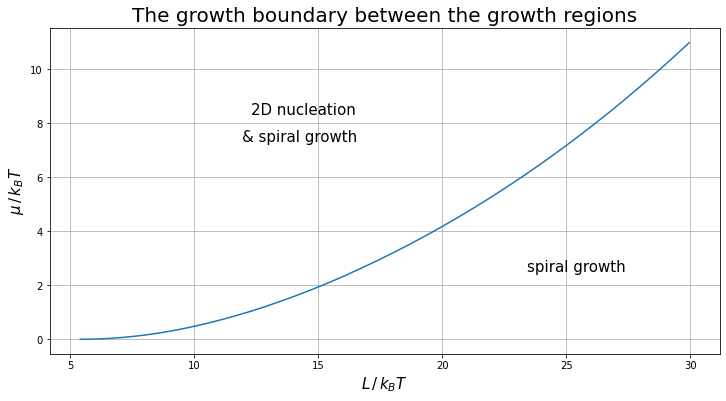

In [186]:
fig, ax = plt.subplots()
ax.plot(L, mu_0)
ax.set_xlabel(r'$L\,/\, k_{B} T$', fontsize=15)
ax.set_ylabel(r'$\mu\,/\, k_{B} T$', fontsize=15)
ax.set_title('The growth boundary between the growth regions', fontsize=20)
ax.text(12.3, 8.3, '2D nucleation', fontsize=15)
ax.text(11.9, 7.3, '& spiral growth', fontsize=15)
ax.text(23.4, 2.5, 'spiral growth', fontsize=15)
ax.grid()
fig.set_size_inches(12, 6)
#plt.savefig('Growth_boundary_between_the_growth_regions.png')
plt.show()

## Analyzing the behaviour of $\gamma$

According to literature the value of $\gamma$ is
\begin{equation}
    \gamma/k_{B}T = \begin{cases} \varphi/2k_{B}T - \mathrm{ln}[\mathrm{coth}(\varphi/4k_{B}T)], & \mbox{if } T < 0.8 T_R \\ 0, & \mbox{if } T \geq 0.92 T_R, \end{cases}
\end{equation}
with $L/k_{B}T_{R} \cong 4.9$. Converting the boundaries to dimensionless units gives us
\begin{equation}
    \begin{split}
        T < 0.8 T_R \qquad &\longrightarrow \qquad L/k_{B}T > 6.125,\\
        T \geq 0.92 T_R \qquad &\longrightarrow \qquad L/k_{B}T \leq 5.326.
    \end{split}
\end{equation}

This subsection is to analyze the behaviour of $\gamma$ near this point.

In [190]:
L = np.arange(4.5, 6.1, 0.01, dtype=float)
T = L/3
gamma_T = 1/2 * T + np.log(np.tanh(1/4*T))
gamma_0 = np.zeros(len(L))

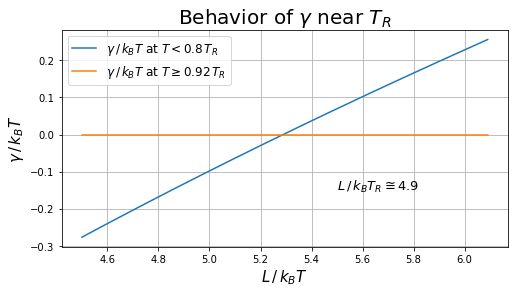

In [198]:
fig, ax = plt.subplots()
ax.plot(L, gamma_T, label=r'$\gamma\,/\, k_{B} T$ at $T<0.8 \, T_{R}$')
ax.plot(L, gamma_0, label=r'$\gamma\,/\, k_{B} T$ at $T \geq 0.92 \, T_{R}$')
ax.set_xlabel(r'$L\,/\, k_{B} T$', fontsize=15)
ax.set_ylabel(r'$\gamma\,/\, k_{B} T$', fontsize=15)
ax.set_title(r'Behavior of $\gamma$ near $T_{R}$', fontsize=20)
ax.legend(loc='best', fontsize='large')
ax.text(5.5, -0.15, r'$L\,/\,k_{B}T_{R} \cong 4.9$', fontsize=13)
ax.grid()
fig.set_size_inches(8, 4)
plt.show()

# Growth rate

The growth rate resulting from the spiral mechanism alone is
\begin{equation}
    \frac{R}{k^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \mu /k_{B}T)]}{\varphi / 2 k_{B} T - \ln[\coth(\varphi / 4 k_{b} T)]}.
\end{equation}
Here $b$ represents the magnitude of the Burgers vector of the dislocation pair in units of the layer spacing, and $d$ is the layer spacing.

The growth rate of a perfect crystal is
\begin{equation}
    \begin{split}
        \frac{R}{k^{+}d} &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right)\\
        \\
        &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left[- \frac{4}{3} \left( \frac{\gamma}{k_{B} T} \right)^2 \frac{k_{B} T}{\Delta \mu} \right]
    \end{split}
\end{equation}
Here $\gamma$ represents the extra free energy of an atom at the edge of the cluster. Cluster refers to a cluster of adatoms.\
According to literature the value of $\gamma$ is dependent on the temperature as
\begin{equation}
    \gamma/k_{B}T = \begin{cases} \varphi/2k_{B}T - \mathrm{ln}[\mathrm{coth}(\varphi/4k_{B}T)], & \mbox{if } L/k_{B}T > 6.125, \\ 0, & \mbox{if } L/k_{B}T \leq 5.326, \end{cases}
\end{equation}
with $L/k_{B}T_{R} \cong 4.9$. 

## Growth rate 2D nucleation code

In [239]:
def nucleation_2D(mu, T):
    L_low = 5.326
    L_high = 6.125
    T_low = L_low/3
    T_high = L_high/3
    R = np.zeros(len(mu))
    mu_plot = mu
    for T_i in T:
        if T_i  <= T_low:
            gamma = 0
        elif T_i > T_high:
            gamma = 1/2*T_i + np.log(np.tanh(1/4*T_i))
        else:
            raise ValueError('Value for T is outside exeptible boundary. T must be in the domain T < {} and {} < T'.format(str(np.round(T_low, decimals=3)), str(np.round(T_high, decimals=3))))
        R_i = (np.pi/3)**(1/3) * mu**(1/6) * (1 - np.exp(-mu))**(2/3) * np.exp(-4/3 * gamma**2 /mu)
        R = np.vstack((R, R_i))
        mu_plot = np.vstack((mu_plot, mu))
    return R[1:,:], mu_plot[1:,:]

In [243]:
L = np.array([4.5, 9, 12])
mu = np.arange(0.01, 4, 0.01, dtype=float)

T = L/3

R, mu_plot = nucleation_2D(mu, T)

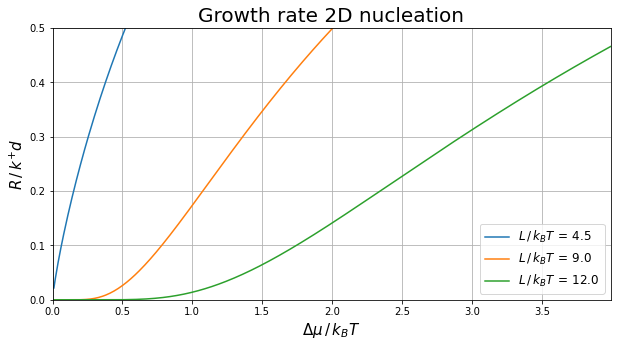

In [247]:
plt.figure(figsize=(10,5))
for i in range(len(L)):
    plt.plot(mu_plot[i,:], R[i,:], label=r'$L\,/\, k_B T \,=\,${}'.format(str(L[i])))
plt.xlabel(r'$\Delta\mu\,/\,k_{B}T$', fontsize=15)
plt.ylabel(r'$R\,/\,k^{+}d$', fontsize=15)
plt.title('Growth rate 2D nucleation', fontsize=20)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.xlim(0, np.max(mu))
plt.ylim(0, 0.5)
#plt.savefig('Growth_rate_2D_nucleation_v1')
plt.show()

$\textbf{The growth rate is too large, somewhere there is probably a factor in the wrong place or something}$

\begin{equation}
    \begin{split}
        \frac{R}{k^{+}d} &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right)\\
        \\
        &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left[ \frac{- 4}{3} \left( \frac{\gamma}{k_{B} T} \right)^2 \frac{k_{B} T}{\Delta \mu} \right]
    \end{split}
\end{equation}

## Growth rate spiral growth